In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from copy import copy

In [2]:
data = pd.read_csv("OnlineNewsPopularity.csv")

In [3]:
data.head(n=4)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.5,-0.1875,0.0,0.1875,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.0,0.0000,0.5,0.0000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.0,0.0000,0.5,0.0000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.0,0.0000,0.5,0.0000,1200


In [4]:
original_data = copy(data)

In [5]:
data.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [6]:
data.columns = data.columns.str.replace(' ', '')

In [7]:
data.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [8]:
data.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [9]:
# creating a grading criteria for shares
# 5 - Excellent 90-100%
# 4 - Very Good 90-80%
# 3 - Good 60-80%
# 2 - Below Average 35-60%
# 1 - Poor 0-35%
share = data['shares']
data['shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

In [10]:
share_rate = list()
for s in share: 
    if s <= 645:
        share_rate.append(1)
    elif s > 645 and s <= 1400:
        share_rate.append(2)
    elif s > 1400 and s <= 31300:
        share_rate.append(3)
    elif s > 31300 and s <= 53700:
        share_rate.append(4)
    else:
        share_rate.append(5)

data = pd.concat([data,pd.DataFrame(share_rate,columns=['rating'])], axis=1)
data.head(4)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,rating
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.7,-0.350000,-0.600,-0.200000,0.5,-0.1875,0.0,0.1875,593,1
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.7,-0.118750,-0.125,-0.100000,0.0,0.0000,0.5,0.0000,711,2
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,1.0,-0.466667,-0.800,-0.133333,0.0,0.0000,0.5,0.0000,1500,3
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.8,-0.369697,-0.600,-0.166667,0.0,0.0000,0.5,0.0000,1200,2


In [11]:
data  = data[data['n_tokens_content'] != 0]

In [12]:
publishdayMerge=data[['weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday', 
                      'weekday_is_thursday', 'weekday_is_friday','weekday_is_saturday' ,'weekday_is_sunday' ]]
temp_arr=[]
for r in list(range(publishdayMerge.shape[0])):
    for c in list(range(publishdayMerge.shape[1])):
        if ((c==0) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Monday')
        elif ((c==1) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Tueday')
        elif ((c==2) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Wednesday')
        elif ((c==3) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Thursday')
        elif ((c==4) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Friday')
        elif ((c==5) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Saturday') 
        elif ((c==6) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Sunday')
            


In [13]:
DataChannelMerge=data[['data_channel_is_lifestyle','data_channel_is_entertainment' ,'data_channel_is_bus',
                        'data_channel_is_socmed' ,'data_channel_is_tech','data_channel_is_world' ]]
#logic to merge data channel
DataChannel_arr=[]
for r in list(range(DataChannelMerge.shape[0])):
    if (((DataChannelMerge.iloc[r,0])==0) and ((DataChannelMerge.iloc[r,1])==0) and ((DataChannelMerge.iloc[r,2])==0) and ((DataChannelMerge.iloc[r,3])==0) and ((DataChannelMerge.iloc[r,4])==0) and ((DataChannelMerge.iloc[r,5])==0)):
        DataChannel_arr.append('Other')
    for c in list(range(DataChannelMerge.shape[1])):
        if ((c==0) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('lifestyle')
        elif ((c==1) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Eentertainment')
        elif ((c==2) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Business')
        elif ((c==3) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Social Media')
        elif ((c==4) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('technology')
        elif ((c==5) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('world news')
# merge the the new data into the dataframe

In [14]:
# merge the the new data into the dataframe
data.insert(loc=11, column='weekdays', value=temp_arr)
data.insert(loc=12, column='news_type', value=DataChannel_arr)

# Now I drop the old data


In [15]:
data.drop(labels=['data_channel_is_lifestyle','data_channel_is_entertainment' ,'data_channel_is_bus',
                        'data_channel_is_socmed' ,'data_channel_is_tech','data_channel_is_world', 
                 'weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday', 
                      'weekday_is_thursday', 'weekday_is_friday','weekday_is_saturday' ,'weekday_is_sunday'], axis = 1, inplace=True)
print(data.shape)
data.head(n=4)

(38463, 51)


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,rating
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.7,-0.350000,-0.600,-0.200000,0.5,-0.1875,0.0,0.1875,593,1
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.7,-0.118750,-0.125,-0.100000,0.0,0.0000,0.5,0.0000,711,2
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,1.0,-0.466667,-0.800,-0.133333,0.0,0.0000,0.5,0.0000,1500,3
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.8,-0.369697,-0.600,-0.166667,0.0,0.0000,0.5,0.0000,1200,2


In [16]:
data.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'weekdays',
       'news_type', 'average_token_length', 'num_keywords', 'kw_min_min',
       'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max',
       'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess', 'is_weekend',
       'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjecti

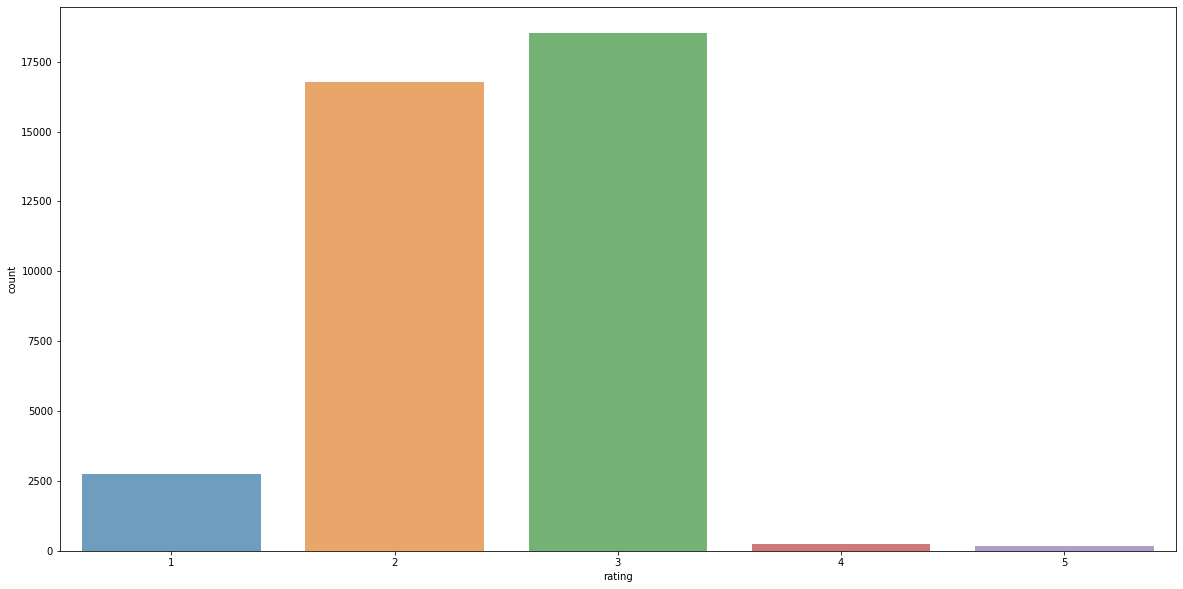

In [33]:
fig = plt.figure(figsize=(20,10))
ax = sns.countplot(x='rating',data=data,alpha=0.7)

In [18]:
class_counts = data.groupby('rating').size().reset_index()
class_counts.columns = ['rating','articles']
class_counts

,rating,articles
0,1,2764
1,2,16787
2,3,18522
3,4,227
4,5,163


In [19]:
weekdays_data = data.groupby('weekdays').size().reset_index()
weekdays_data.columns = ['weekdays','count']
weekdays_data

,weekdays,count
0,Friday,5538
1,Monday,6471
2,Saturday,2369
3,Sunday,2657
4,Thursday,7052
5,Tueday,7171
6,Wednesday,7205


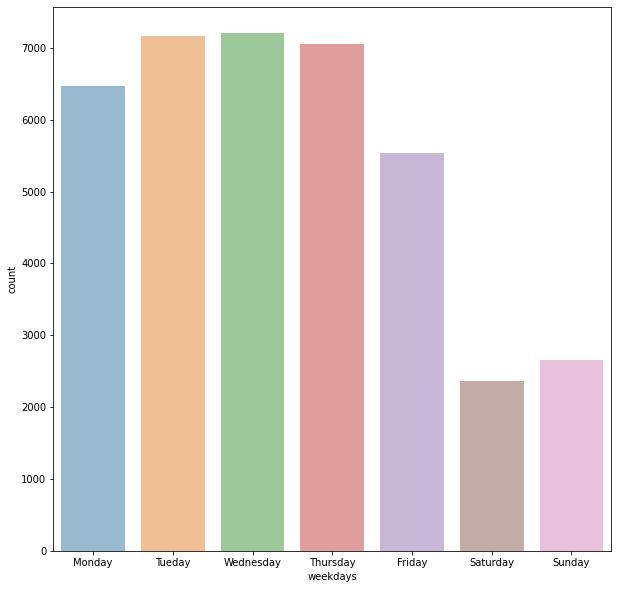

In [20]:
fig, axes = plt.subplots(figsize=(10,10))
ax = sns.countplot(x='weekdays',data=data,alpha=0.5, ax=axes)

<AxesSubplot:xlabel='num_videos', ylabel='rating'>

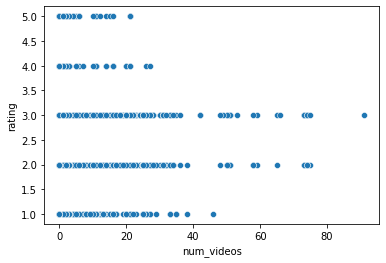

In [32]:
sns.scatterplot(x='num_videos',y='rating', data=data)

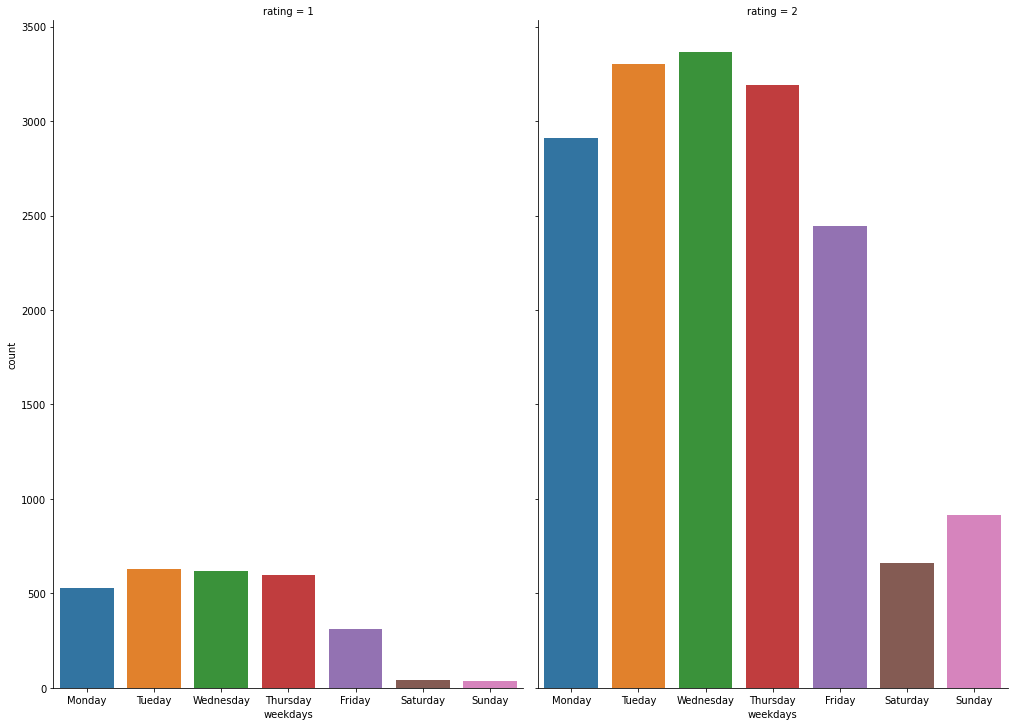

In [22]:
temp_data = data[(data['rating'] == 1) | (data['rating'] == 2)]
ax = sns.catplot(x='weekdays', col="rating", data=temp_data, kind="count", height=10, aspect=.7)

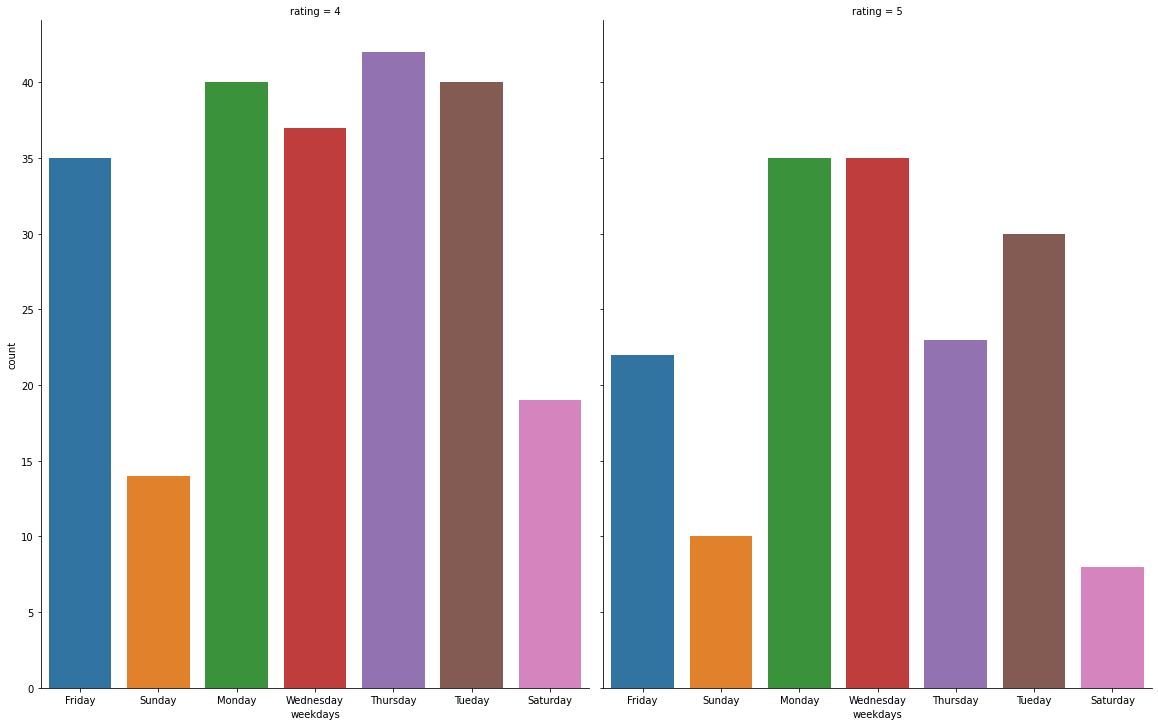

In [23]:
temp_data = data[(data['rating'] == 4) | (data['rating'] == 5)]
ax = sns.catplot(x='weekdays', col="rating", data=temp_data, kind="count", height=10, aspect=.8)

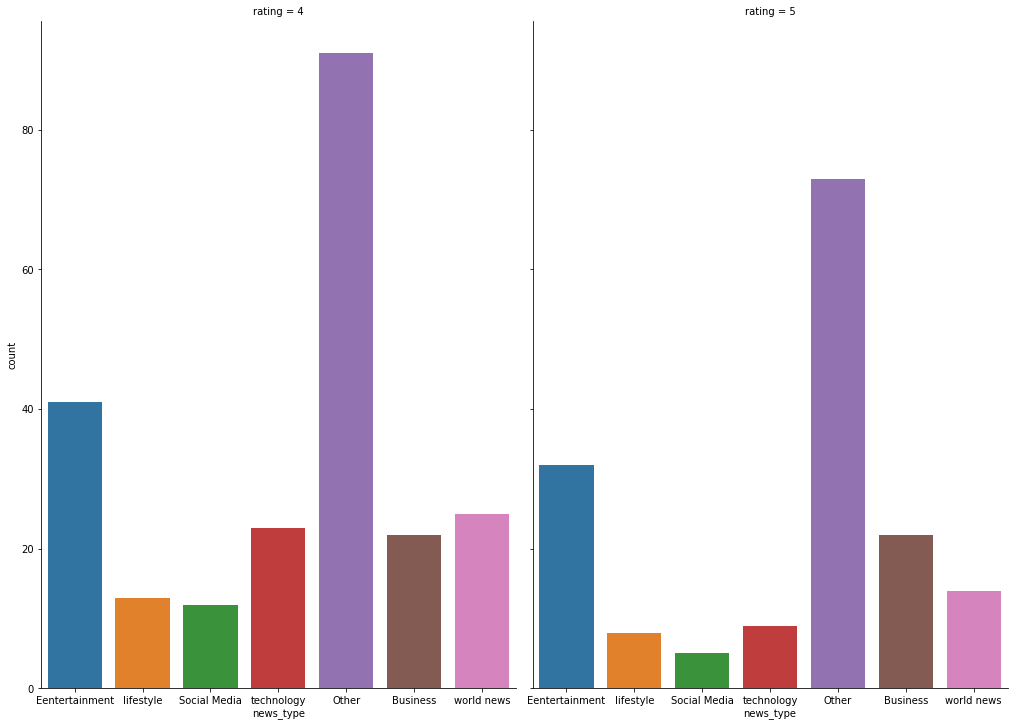

In [24]:
temp_data = data[(data['rating'] == 4) | (data['rating'] == 5)]
ax = sns.catplot(x='news_type', col="rating", data=temp_data, kind="count", height=10, aspect=.7)

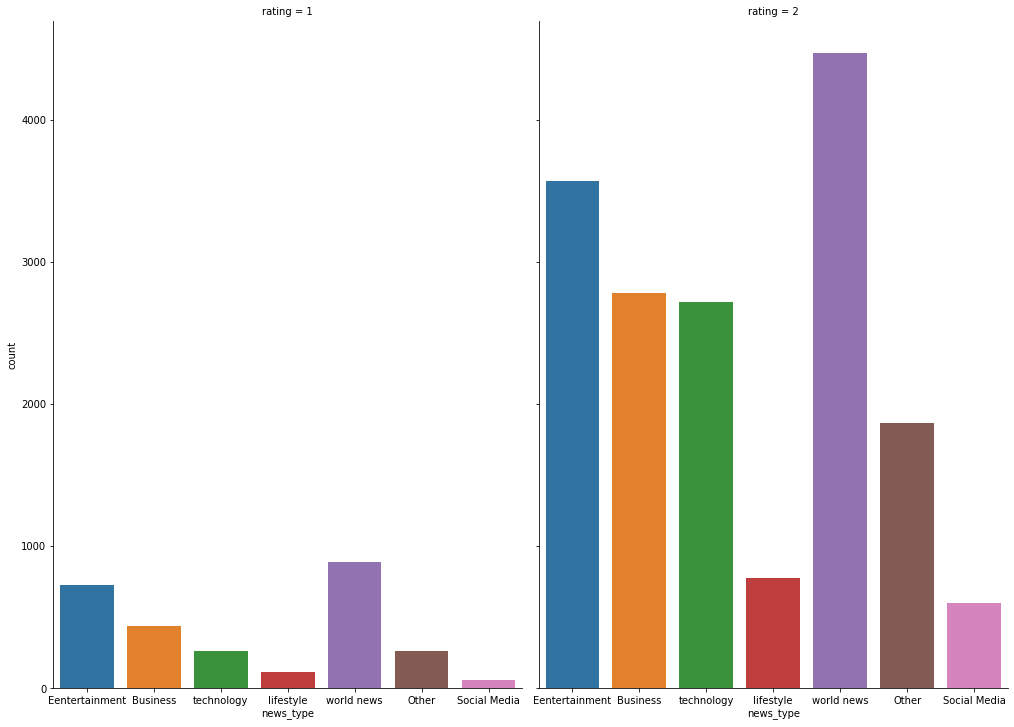

In [25]:
temp_data = data[(data['rating'] == 1) | (data['rating'] == 2)]
ax = sns.catplot(x='news_type', col="rating", data=temp_data, kind="count", height=10, aspect=.7)

<AxesSubplot:xlabel='rating', ylabel='num_imgs'>

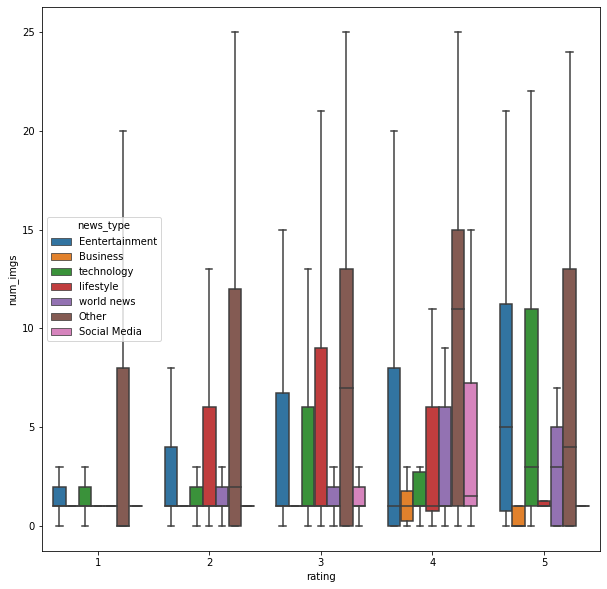

In [39]:
fig,ax = plt.subplots(figsize=(10,10))
temp_data = data[data['num_imgs'] <= 25]
sns.boxplot(x='rating',y='num_imgs', hue='news_type', data=temp_data, showfliers=False)

In [40]:
#Finding relationship between 'rate_positive_words', 'rate_negative_words', 'global_rate_positive_words', 'global_rate_negative_words', and 'shares'
temp_data = data[data['shares'] <= 100000]

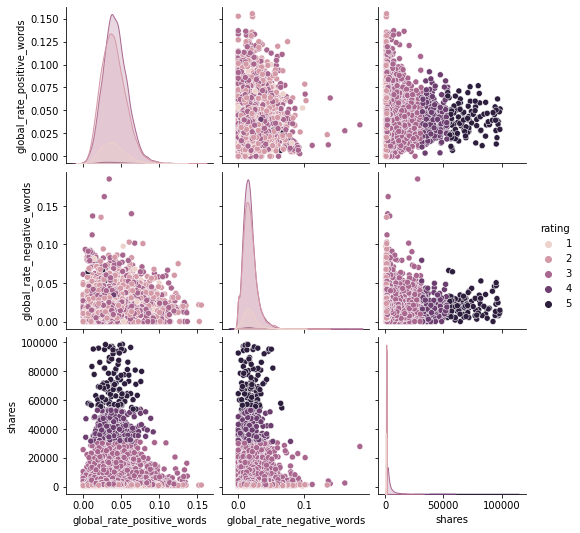

In [45]:
kw_cols = ['global_rate_positive_words', 'global_rate_negative_words', 'shares']
sns.pairplot(temp_data, vars=kw_cols, hue='rating', diag_kind='kde')

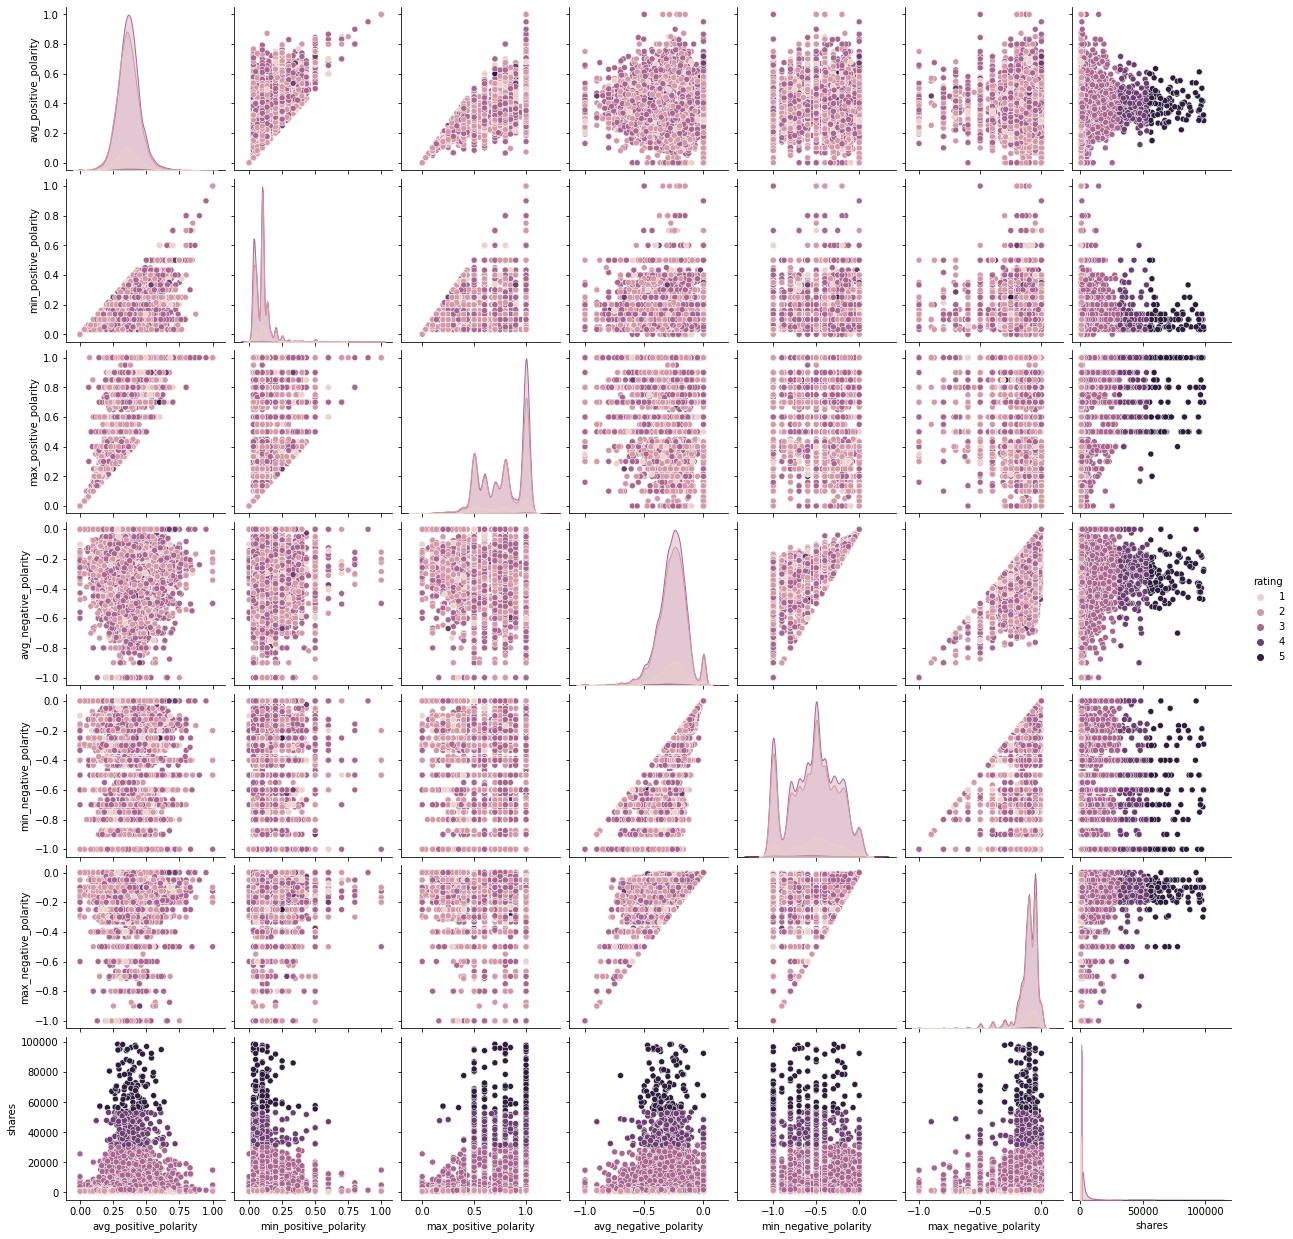

In [46]:
temp_data = data[data['shares'] <= 100000]
# running a pair plot for the terms
kw_cols = ['avg_positive_polarity', 'min_positive_polarity', 'max_positive_polarity', 'avg_negative_polarity', 'min_negative_polarity', 'max_negative_polarity', 'shares']
# run a pairplot
sns.pairplot(temp_data, vars=kw_cols, hue='rating', diag_kind='kde')

<AxesSubplot:xlabel='num_hrefs', ylabel='shares'>

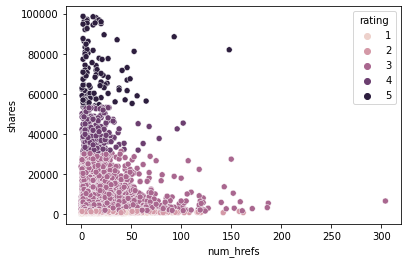

In [53]:
temp_data = data[data['shares'] <= 100000]
sns.scatterplot(x='num_hrefs',y='shares', hue='rating', data=temp_data)

<AxesSubplot:xlabel='rating', ylabel='num_hrefs'>

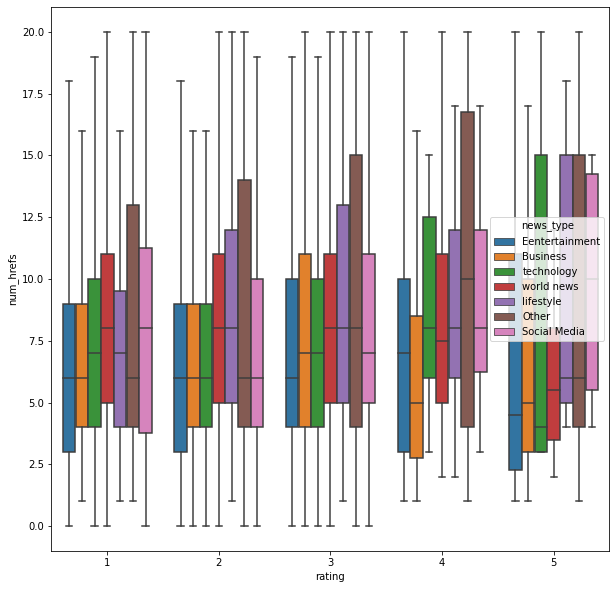

In [50]:
fig,ax = plt.subplots(figsize=(10,10))
temp_data = data[data['num_hrefs'] <= 20]
sns.boxplot(x='rating',y='num_hrefs', hue='news_type', data=temp_data, showfliers=False)

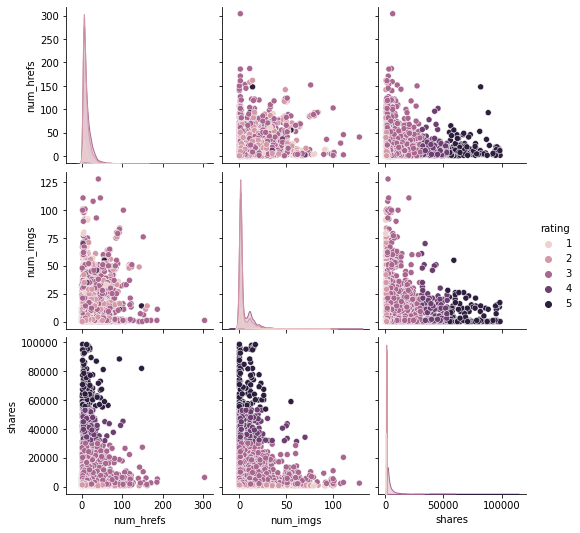

In [51]:
temp_data = data[data['shares'] <= 100000]
# running a pair plot for the terms
kw_cols = ['num_hrefs', 'num_imgs','shares']
# run a pairplot
sns.pairplot(temp_data, vars=kw_cols, hue='rating', diag_kind='kde')

<AxesSubplot:xlabel='num_videos', ylabel='shares'>

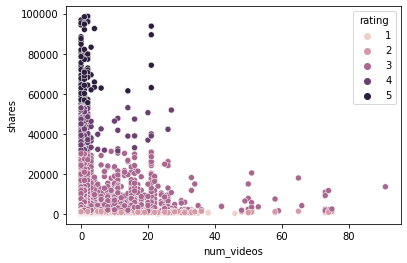

In [58]:
temp_data = data[data['shares'] <= 100000]
sns.scatterplot(x='num_videos',y='shares', hue='rating', data=temp_data)

<AxesSubplot:xlabel='rating', ylabel='num_videos'>

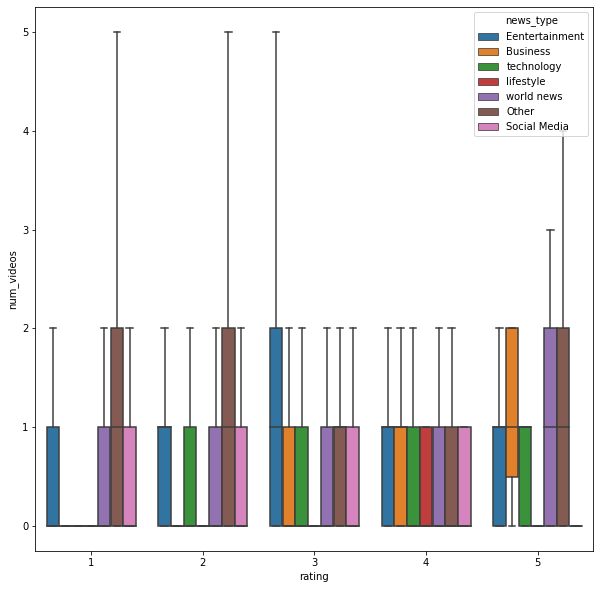

In [60]:
fig,ax = plt.subplots(figsize=(10,10))
temp_data = data[data['shares'] <= 100000]
sns.boxplot(x='rating',y='num_videos', hue='news_type', data=temp_data, showfliers=False)

<AxesSubplot:xlabel='n_tokens_content', ylabel='shares'>

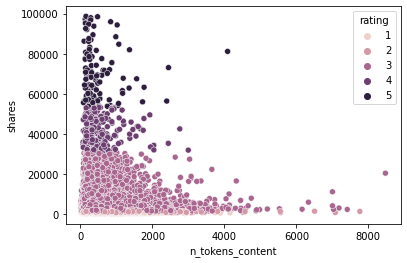

In [66]:
temp_data = data[data['shares'] <= 100000]
sns.scatterplot(x='n_tokens_content',y='shares', hue='rating', data=temp_data)

In [67]:
data.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'weekdays',
       'news_type', 'average_token_length', 'num_keywords', 'kw_min_min',
       'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max',
       'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess', 'is_weekend',
       'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjecti

<AxesSubplot:xlabel='num_keywords', ylabel='rating'>

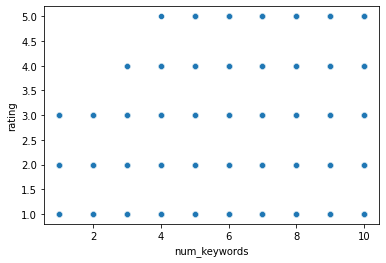

In [79]:
sns.scatterplot(x='num_keywords',y='rating', data=data)

<AxesSubplot:xlabel='num_keywords', ylabel='shares'>

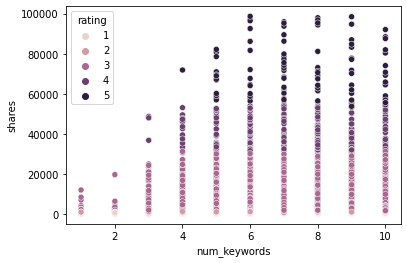

In [80]:
temp_data = data[data['shares'] <= 100000]
sns.scatterplot(x='num_keywords',y='shares', hue='rating', data=temp_data)